In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("unifed_csv_without_duplicated_company.csv")
df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 132 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_uuid                      37198 non-null  object 
 1   country_code                      33609 non-null  object 
 2   region                            33609 non-null  object 
 3   city                              33609 non-null  object 
 4   operating                         37198 non-null  int64  
 5   closed                            37198 non-null  int64  
 6   success                           37198 non-null  int64  
 7   success_acquired                  37198 non-null  int64  
 8   success_ipo                       37198 non-null  int64  
 9   num_funding_rounds                12036 non-null  float64
 10  total_funding_usd                 9093 non-null   float64
 11  founded_on                        37198 non-null  float64
 12  las

In [3]:
#Create dataframe for features
features=df[["company_uuid", "operating","closed","success","success_acquired","success_ipo", "num_funding_rounds","Financial Services","FinTech","Finance","Blockchain", "Information Technology", "Software",  "Payments" , "Cryptocurrency", "Venture Capital","Internet", "Banking", "Consulting",  "Mobile Payments","E-Commerce", "Insurance", "Bitcoin", "Artificial Intelligence", "Mobile", "Crowdfunding","SaaS",  "Real Estate", "Apps", "Personal Finance","Accounting", "Mobile Apps", "Asset Management", "Marketplace", "Lending", "Big Data", "Machine Learning", "gender_male", "gender_female" ]].copy()
dummy= df.columns[70:]
dummy_df= df[dummy]
features= features.join(dummy_df)
features.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 101 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   company_uuid                     37198 non-null  object 
 1   operating                        37198 non-null  int64  
 2   closed                           37198 non-null  int64  
 3   success                          37198 non-null  int64  
 4   success_acquired                 37198 non-null  int64  
 5   success_ipo                      37198 non-null  int64  
 6   num_funding_rounds               12036 non-null  float64
 7   Financial Services               37198 non-null  int64  
 8   FinTech                          37198 non-null  int64  
 9   Finance                          37198 non-null  int64  
 10  Blockchain                       37198 non-null  int64  
 11  Information Technology           37198 non-null  int64  
 12  Software         

In [4]:
features= features.drop(columns=["time_in_year","investment_delta", "norm_amount_delta", "momentum", "max_norm_amount_delta", "roi_from_mean_momentum", "continent", "ROI" ])

In [6]:
#Deal with null value in num_funding_rounds and mean ROI
features["num_funding_rounds"]=features["num_funding_rounds"].fillna(0)

features["mean_norm_amount_delta"]=features["mean_norm_amount_delta"].fillna(0)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 93 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   company_uuid                     37198 non-null  object 
 1   operating                        37198 non-null  int64  
 2   closed                           37198 non-null  int64  
 3   success                          37198 non-null  int64  
 4   success_acquired                 37198 non-null  int64  
 5   success_ipo                      37198 non-null  int64  
 6   num_funding_rounds               37198 non-null  float64
 7   Financial Services               37198 non-null  int64  
 8   FinTech                          37198 non-null  int64  
 9   Finance                          37198 non-null  int64  
 10  Blockchain                       37198 non-null  int64  
 11  Information Technology           37198 non-null  int64  
 12  Software          

In [8]:
# define independent variables/attirbutes/features
x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
y = features["mean_norm_amount_delta"]

#Make "mean_norm_amount_delta" column 1/0
binary_labels = [0,1]
y = pd.qcut(y, 2, labels = binary_labels)
y

0        0
1        0
2        0
3        0
4        0
        ..
37193    0
37194    0
37195    0
37196    0
37197    1
Name: mean_norm_amount_delta, Length: 37198, dtype: category
Categories (2, int64): [0 < 1]

In [9]:
# Train model 
first_lm = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 5)


y_train = y_train.to_numpy()
firs_lm = first_lm.fit(X_train, y_train)

print(mean_squared_error(y_test, first_lm.predict(X_test)))



0.038924826569246014


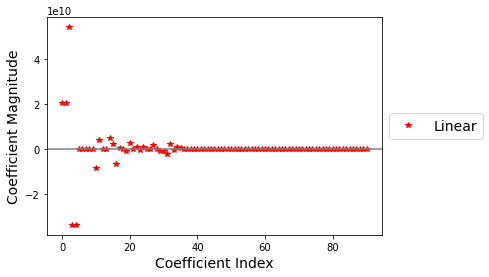

In [11]:
plt.plot(first_lm.coef_,linestyle='none',marker='*',markersize=6,color='red',label='Linear') 
plt.axhline(y=0, color='grey', linestyle='-')
plt.xlabel('Coefficient Index',fontsize=14)
plt.ylabel('Coefficient Magnitude',fontsize=14)
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()